# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.9.1-beta.fix.282.283'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Detailed citaition list:
Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
National Institute for Public Health and the Environment of Netherlands (2020), https://data.rivm.nl/covid-19/
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Eng

### The number of cases (JHU style)
The main dataset is that of the number of cases. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [6]:
# Citation of COVID-19 Data Hub: this was shown when `DataLoader.jhu(verbose=True)
# print(data_loader.covid19dh_citation)

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
304256,2020-10-26,787,738,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304257,2020-10-27,787,757,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304258,2020-10-28,789,759,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304259,2020-10-29,789,766,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304260,2020-10-30,789,766,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
304256,2020-10-26,Colombia,Vichada,787,40,9,738
304257,2020-10-27,Colombia,Vichada,787,21,9,757
304258,2020-10-28,Colombia,Vichada,789,21,9,759
304259,2020-10-29,Colombia,Vichada,789,14,9,766
304260,2020-10-30,Colombia,Vichada,789,14,9,766


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
221,2020-10-26,30127,1788,450,27889
222,2020-10-27,30285,1848,451,27986
223,2020-10-28,30456,1787,451,28218
224,2020-10-29,30677,1851,453,28373
225,2020-10-30,30881,1900,455,28526


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-10-26,43587193,13296730,1163011,29127452,0.013341,0.334129,0.038395
2020-10-27,44060198,13171328,1170344,29718526,0.013281,0.337249,0.037889
2020-10-28,44550518,13404921,1177237,29968360,0.013212,0.336341,0.037798
2020-10-29,45046876,13653044,1183877,30209955,0.013141,0.335317,0.037710
2020-10-30,45095213,13691549,1184296,30219368,0.013131,0.335062,0.037712


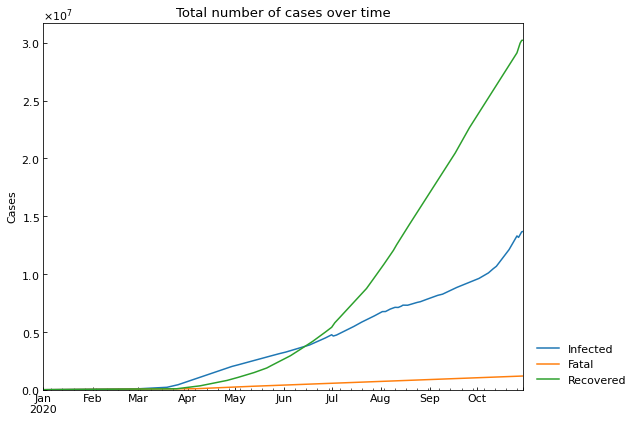

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan
If we have dataset for each country, we can use it optionally.

In [12]:
# Registered data in jhu_data
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
260,2020-10-26,97508,6100,1727,89681
261,2020-10-27,98154,6298,1732,90124
262,2020-10-28,98884,6363,1737,90784
263,2020-10-29,99693,6644,1747,91302
264,2020-10-30,100469,6843,1755,91871


In [13]:
# Download the dataset in Japan and show the citation
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [14]:
# Replace the dataset for Japan
jhu_data.replace(japan_data)
# Show the new records in Japan
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
258,2020-10-26,97074,5647,1718,89709
259,2020-10-27,97498,5625,1725,90148
260,2020-10-28,98116,5579,1730,90807
261,2020-10-29,98852,5797,1733,91322
262,2020-10-30,99622,5988,1744,91890


### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models.

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
304256,2020-10-26,787,738,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304257,2020-10-27,787,757,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304258,2020-10-28,789,759,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304259,2020-10-29,789,766,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304260,2020-10-30,789,766,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
257083,COL,Colombia,Vichada,2020-10-26,107808
257084,COL,Colombia,Vichada,2020-10-27,107808
257085,COL,Colombia,Vichada,2020-10-28,107808
257086,COL,Colombia,Vichada,2020-10-29,107808
257087,COL,Colombia,Vichada,2020-10-30,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)
This will be used in [Usage (details: policy measures)](https://lisphilar.github.io/covid19-sir/usage_policy.html).

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
304256,2020-10-26,787,738,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304257,2020-10-27,787,757,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304258,2020-10-28,789,759,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304259,2020-10-29,789,766,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74
304260,2020-10-30,789,766,9,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,0,65.74


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
304256,2020-10-26,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
304257,2020-10-27,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
304258,2020-10-28,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
304259,2020-10-29,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74
304260,2020-10-30,Colombia,COL,3,1,1,3,1,1,1,4,2,2,0,65.74


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
299,2020-10-26,0,1,1,0,0,1,1,3,2,2,1,35.19
300,2020-10-27,0,1,1,0,0,1,1,3,2,2,1,35.19
301,2020-10-28,0,1,1,0,0,1,1,3,2,2,1,35.19
302,2020-10-29,0,1,1,0,0,1,1,3,2,2,1,35.19
303,2020-10-30,0,1,1,0,0,1,1,3,2,2,1,35.19


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
299,2020-10-26,0,1,1,0,0,1,1,3,2,2,1,35.19
300,2020-10-27,0,1,1,0,0,1,1,3,2,2,1,35.19
301,2020-10-28,0,1,1,0,0,1,1,3,2,2,1,35.19
302,2020-10-29,0,1,1,0,0,1,1,3,2,2,1,35.19
303,2020-10-30,0,1,1,0,0,1,1,3,2,2,1,35.19


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

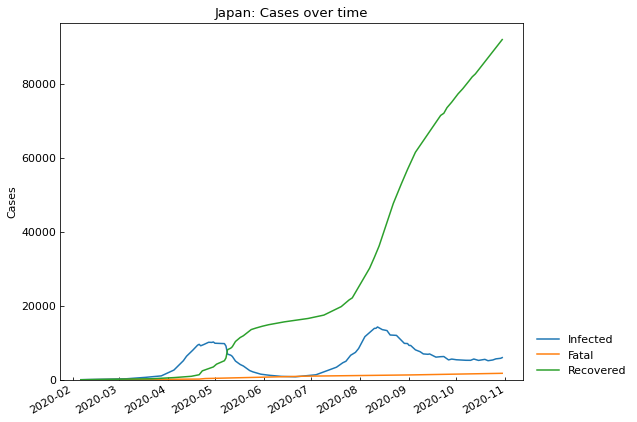

,Date,Confirmed,Infected,Fatal,Recovered
258,2020-10-26,97074,5647,1718,89709
259,2020-10-27,97498,5625,1725,90148
260,2020-10-28,98116,5579,1730,90807
261,2020-10-29,98852,5797,1733,91322
262,2020-10-30,99622,5988,1744,91890


In [26]:
record_df = snl.records()
record_df.tail()

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

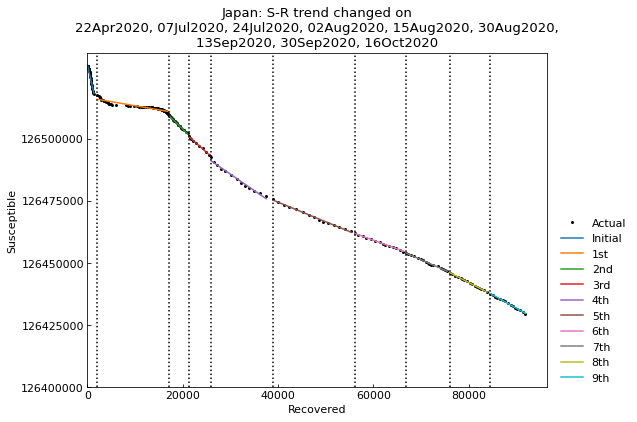

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,06Jul2020,126529100
2nd,Past,07Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,29Aug2020,126529100
6th,Past,30Aug2020,12Sep2020,126529100
7th,Past,13Sep2020,29Sep2020,126529100
8th,Past,30Sep2020,15Oct2020,126529100
9th,Past,16Oct2020,30Oct2020,126529100


In [27]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [28]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 9th phase (16Oct2020 - 30Oct2020): finished 1562 trials in 1 min  1 sec


	 2nd phase (07Jul2020 - 23Jul2020): finished  827 trials in 0 min 30 sec

	 0th phase (06Feb2020 - 21Apr2020): finished 1371 trials in 1 min  0 sec

	 1st phase (22Apr2020 - 06Jul2020): finished 1354 trials in 1 min  0 sec

	 3rd phase (24Jul2020 - 01Aug2020): finished 1475 trials in 1 min  0 sec

	 6th phase (30Aug2020 - 12Sep2020): finished  323 trials in 0 min 10 sec

	 7th phase (13Sep2020 - 29Sep2020): finished  348 trials in 0 min 10 sec

	 5th phase (15Aug2020 - 29Aug2020): finished  787 trials in 0 min 25 sec

	 4th phase (02Aug2020 - 14Aug2020): finished 1536 trials in 1 min  0 sec

	 8th phase (30Sep2020 - 15Oct2020): finished 1761 trials in 1 min  0 sec

Completed optimization. Total: 3 min 12 sec


In [29]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.97,0.001357,0.000239,0.012970,0.002367,180,0.001,523,52,9,0.926782,1371,1 min 0 sec
1st,Past,22Apr2020,06Jul2020,126529100,SIR-F,0.42,0.032695,0.000253,0.004050,0.009079,180,0.033,494,13,30,1.014717,1354,1 min 0 sec
2nd,Past,07Jul2020,23Jul2020,126529100,SIR-F,1.88,0.001623,0.000010,0.017346,0.009218,180,0.002,12043,13,7,0.030751,827,0 min 30 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.67,0.000019,0.000041,0.017992,0.010726,180,0.000,3066,11,6,0.024042,1475,1 min 0 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.52,0.000938,0.000031,0.012918,0.008464,180,0.001,3998,14,9,0.062987,1536,1 min 0 sec
5th,Past,15Aug2020,29Aug2020,126529100,SIR-F,0.79,0.000645,0.000117,0.010408,0.012992,180,0.001,1072,9,12,0.031346,787,0 min 25 sec
6th,Past,30Aug2020,12Sep2020,126529100,SIR-F,0.64,0.000131,0.000168,0.008072,0.012535,180,0.000,743,9,15,0.050715,323,0 min 10 sec
7th,Past,13Sep2020,29Sep2020,126529100,SIR-F,0.89,0.000066,0.000152,0.009695,0.010752,180,0.000,824,11,12,0.053522,348,0 min 10 sec
8th,Past,30Sep2020,15Oct2020,126529100,SIR-F,0.99,0.000729,0.000120,0.013368,0.013364,180,0.001,1043,9,9,0.018284,1761,1 min 0 sec
9th,Past,16Oct2020,30Oct2020,126529100,SIR-F,1.04,0.000157,0.000197,0.012994,0.012237,180,0.000,633,10,9,0.028859,1562,1 min 1 sec


### Accuracy of estimation

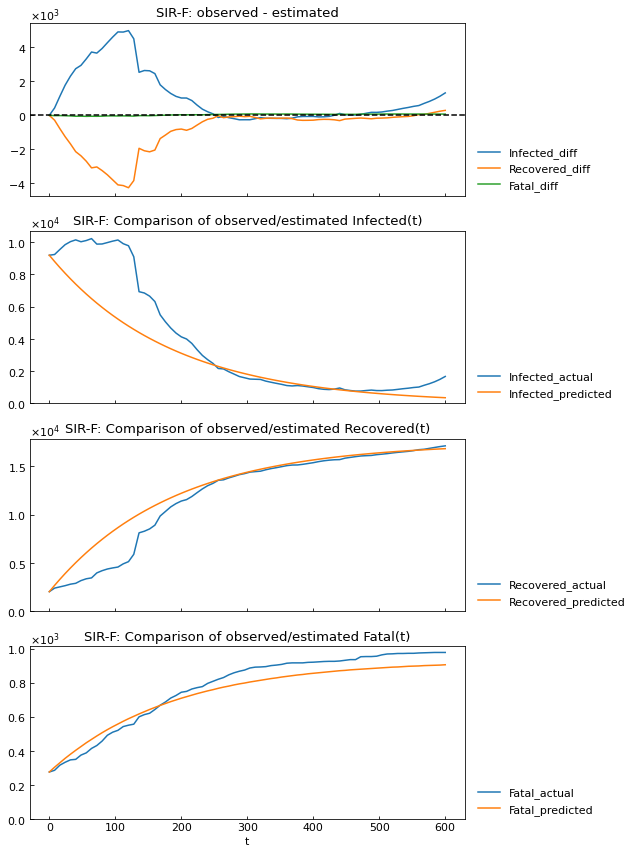

In [30]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
snl.get("Rt", phase="4th")

1.52

### Show parameter history

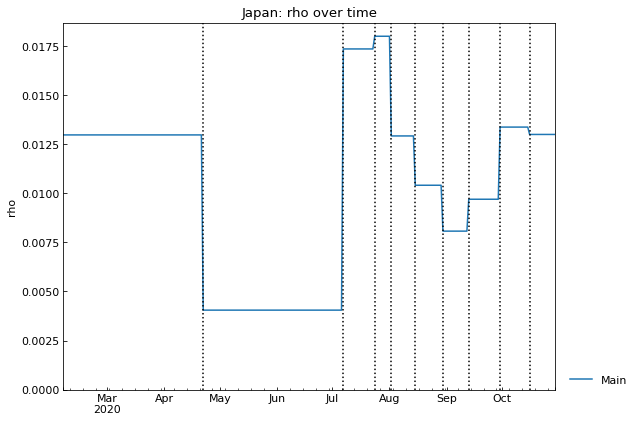

In [32]:
_ = snl.history(target="rho")

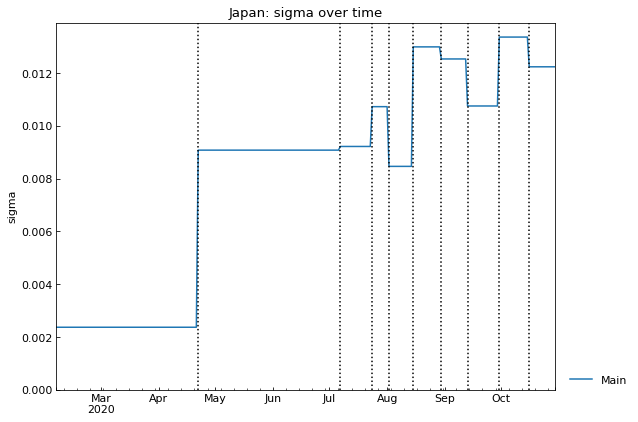

In [33]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

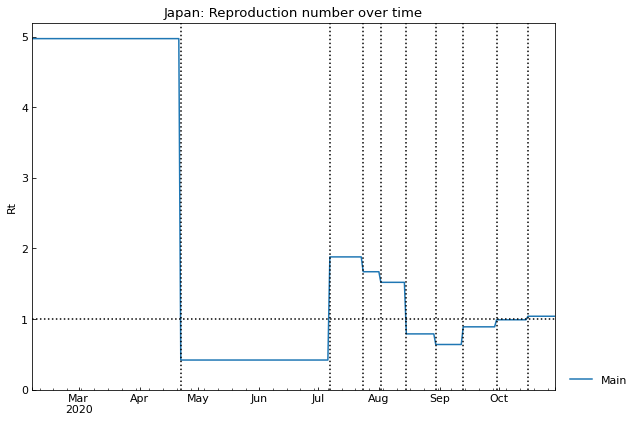

In [34]:
_ = snl.history(target="Rt")

### Simulate the number of cases

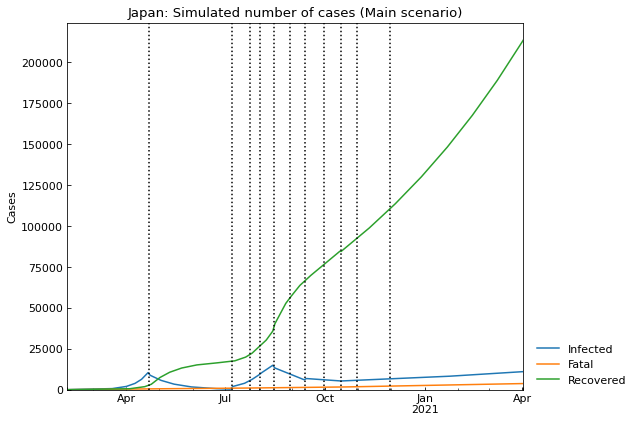

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,223872,3684,10853,209335
418,2021-03-30,225001,3702,10899,210400
419,2021-03-31,226134,3719,10946,211469
420,2021-04-01,227273,3737,10993,212543
421,2021-04-02,228415,3754,11040,213621


In [35]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [36]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.01223727995041678

In [37]:
sigma_new = sigma_current * 2
sigma_new

0.02447455990083356

In [38]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.97   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.42   
         2nd      Past  07Jul2020  23Jul2020   126529100  SIR-F  1.88   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.67   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.52   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.79   
         6th      Past  30Aug2020  12Sep2020   126529100  SIR-F  0.64   
         7th      Past  13Sep2020  29Sep2020   126529100  SIR-F  0.89   
         8th      Past  30Sep2020  15Oct2020   126529100  SIR-F  0.99   
         9th      Past  16Oct2020  30Oct2020   126529100  SIR-F  1.04   
         10th   Future  31Oct2020  29Nov2020   126529100  SIR-F  1.04   
         11th   Future  30Nov2020  01Apr2021   126529100  SIR-F  1.04   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.97   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.42   
         2nd      Past  07Jul2020  23Jul2020   126529100  SIR-F  1.88   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.67   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.52   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.79   
         6th      Past  30Aug2020  12Sep2020   126529100  SIR-F  0.64   
         7th      Past  13Sep2020  29Sep2020   126529100  SIR-F  0.89   
         8th      Past  30Sep2020  15Oct2020   126529100  SIR-F  0.99   
         9th      Past  16Oct2020  30Oct2020   126529100  SIR-F  1.04   
         10th   Future  31Oct2020  29Nov2020   126529100  SIR-F  1.04   
         11th   Future  30Nov2020  01Apr2021   126529100  SIR-F  0.53   

                   theta     kappa       rho     sigma  tau  alpha1 [-]  \
Scenario Phase                                                            
Main     0th    0.001357  0.000239  0.012970  0.002367  180       0.001   
         1st    0.032695  0.000253  0.004050  0.009079  180       0.033   
         2nd    0.001623  0.000010  0.017346  0.009218  180       0.002   
         3rd    0.000019  0.000041  0.017992  0.010726  180       0.000   
         4th    0.000938  0.000031  0.012918  0.008464  180       0.001   
         5th    0.000645  0.000117  0.010408  0.012992  180       0.001   
         6th    0.000131  0.000168  0.008072  0.012535  180       0.000   
         7th    0.000066  0.000152  0.009695  0.010752  180       0.000   
         8th    0.000729  0.000120  0.013368  0.013364  180       0.001   
         9th    0.000157  0.000197  0.012994  0.012237  180       0.000   
         10th   0.000157  0.000197  0.012994  0.012237  180       0.000   
         11th   0.000157  0.000197  0.012994  0.012237  180       0.000   
Medicine 0th    0.001357  0.000239  0.012970  0.002367  180       0.001   
         1st    0.032695  0.000253  0.004050  0.009079  180       0.033   
         2nd    0.001623  0.000010  0.017346  0.009218  180       0.002   
         3rd    0.000019  0.000041  0.017992  0.010726  180       0.000   
         4th    0.000938  0.000031  0.012918  0.008464  180       0.001   
         5th    0.000645  0.000117  0.010408  0.012992  180       0.001   
         6th    0.000131  0.000168  0.008072  0.012535  180       0.000   
         7th    0.000066  0.000152  0.009695  0.010752  180       0.000   
         8th    0.000729  0.000120  0.013368  0.013364  180       0.001   
         9th    0.000157  0.000197  0.012994  0.012237  180       0.000   
         10th   0.000157  0.000197  0.012994  0.012237  180       0.000   
         11th   0.000157  0.000197  0.012994  0.024475  180       0.000   

                1/alpha2 [day]  1/gamma [day]  1/beta [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main  

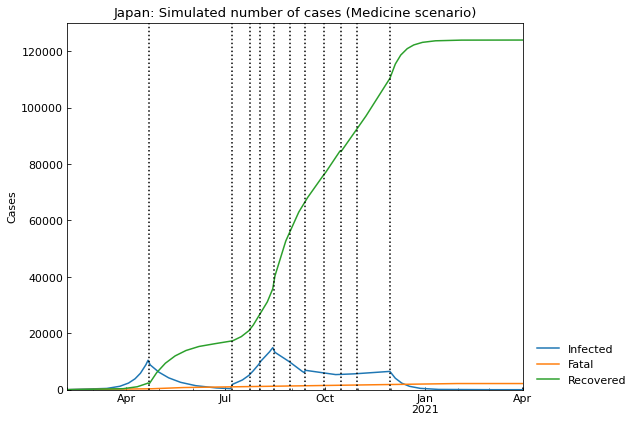

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,126171,2184,0,123987
418,2021-03-30,126171,2184,0,123987
419,2021-03-31,126171,2184,0,123987
420,2021-04-01,126171,2184,0,123987
421,2021-04-02,126171,2184,0,123987


In [39]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [40]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,11th_Rt
Main,14917,14Aug2020,228415,11040,3754,1.04
Medicine,14917,14Aug2020,126171,0,2184,0.53


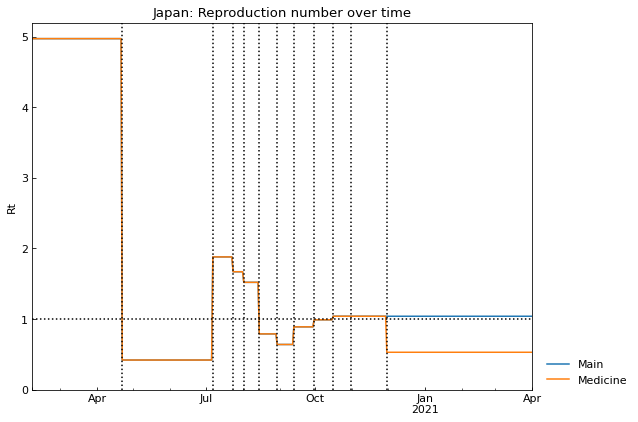

In [41]:
_ = snl.history(target="Rt")

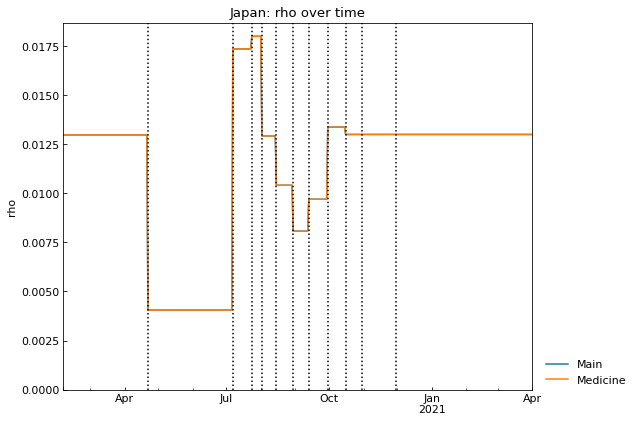

In [42]:
_ = snl.history(target="rho")

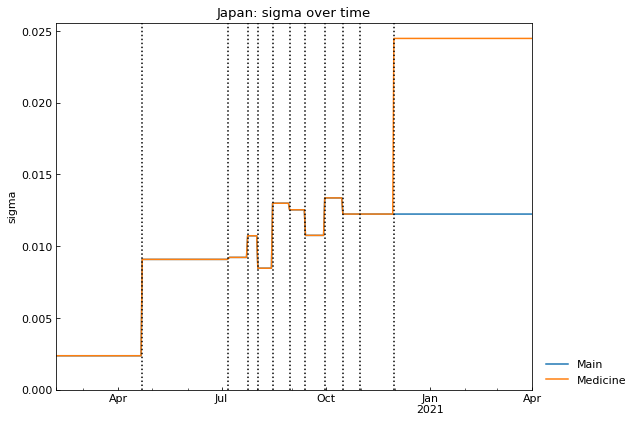

In [43]:
_ = snl.history(target="sigma")

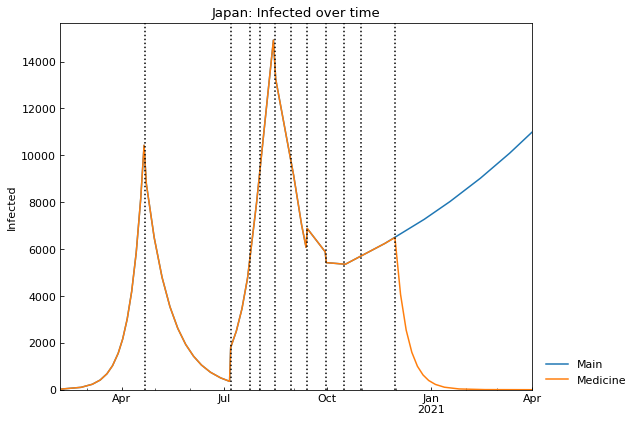

In [44]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

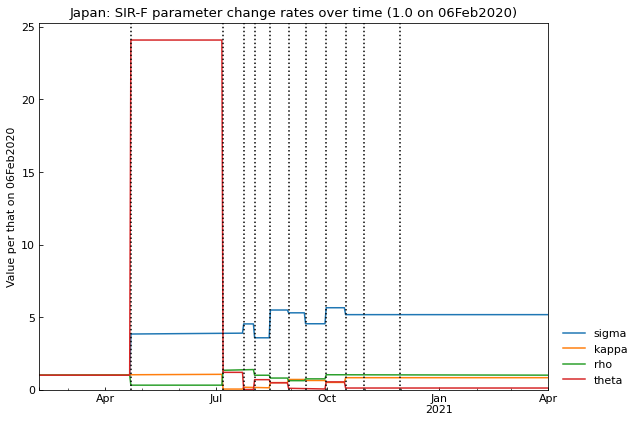

In [45]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [46]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	10th phase (16Oct2020 - 30Oct2020): finished 1424 trials in 1 min  1 sec


	 2nd phase (07Jul2020 - 23Jul2020): finished  759 trials in 0 min 25 sec

	 0th phase (06Feb2020 - 21Apr2020): finished 1471 trials in 1 min  0 sec

	 3rd phase (24Jul2020 - 01Aug2020): finished 1544 trials in 1 min  0 sec

	 1st phase (22Apr2020 - 06Jul2020): finished 1441 trials in 1 min  0 sec

	 6th phase (30Aug2020 - 31Aug2020): finished  230 trials in 0 min  5 sec

	 7th phase (01Sep2020 - 12Sep2020): finished  166 trials in 0 min  5 sec

	 8th phase (13Sep2020 - 29Sep2020): finished  320 trials in 0 min 10 sec

	 4th phase (02Aug2020 - 14Aug2020): finished 1512 trials in 1 min  0 sec

	 5th phase (15Aug2020 - 29Aug2020): finished  821 trials in 0 min 30 sec

	 9th phase (30Sep2020 - 15Oct2020): finished 1623 trials in 1 min  0 sec

Completed optimization. Total: 3 min  8 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 7th phase (01Sep2020 - 30Oct2020): finished 5683 trials in 1 min  0 sec

Completed optimization. Total: 1 min  0 sec


In [47]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  21Apr2020  SIR-F  5.00  0.016646  0.000063   
              1st    22Apr2020  06Jul2020  SIR-F  0.43  0.016685  0.000357   
              2nd    07Jul2020  23Jul2020  SIR-F  1.88  0.001623  0.000010   
              3rd    24Jul2020  01Aug2020  SIR-F  1.67  0.000019  0.000041   
              4th    02Aug2020  14Aug2020  SIR-F  1.52  0.000938  0.000031   
              5th    15Aug2020  29Aug2020  SIR-F  0.79  0.000645  0.000117   
              6th    30Aug2020  31Aug2020  SIR-F  0.91  0.001603  0.000246   
              7th    01Sep2020  12Sep2020  SIR-F  0.68  0.013109  0.000054   
              8th    13Sep2020  29Sep2020  SIR-F  0.89  0.000066  0.000152   
              9th    30Sep2020  15Oct2020  SIR-F  0.99  0.000729  0.000120   
              10th   16Oct2020  30Oct2020  SIR-F  1.04  0.000157  0.000197   
Retrospective 0th    06Feb2020  21Apr2020  SIR-F  5.00  0.016646  0.000063   
              1st    22Apr2020  06Jul2020  SIR-F  0.43  0.016685  0.000357   
              2nd    07Jul2020  23Jul2020  SIR-F  1.88  0.001623  0.000010   
              3rd    24Jul2020  01Aug2020  SIR-F  1.67  0.000019  0.000041   
              4th    02Aug2020  14Aug2020  SIR-F  1.52  0.000938  0.000031   
              5th    15Aug2020  29Aug2020  SIR-F  0.79  0.000645  0.000117   
              6th    30Aug2020  31Aug2020  SIR-F  0.91  0.001603  0.000246   
              7th    01Sep2020  30Oct2020  SIR-F  0.91  0.001603  0.000246   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.012935  0.002480  0.914821    1471  1 min  0 sec  
              1st    0.004005  0.008875  0.968540    1441  1 min  0 sec  
              2nd    0.017346  0.009218  0.030751     759  0 min 25 sec  
              3rd    0.017992  0.010726  0.024042    1544  1 min  0 sec  
              4th    0.012918  0.008464  0.062987    1512  1 min  0 sec  
              5th    0.010408  0.012992  0.031346     821  0 min 30 sec  
              6th    0.007682  0.008151  0.000854     230  0 min  5 sec  
              7th    0.009220  0.013402  0.030096     166  0 min  5 sec  
              8th    0.009695  0.010752  0.053522     320  0 min 10 sec  
              9th    0.013368  0.013364  0.018284    1623  1 min  0 sec  
              10th   0.012994  0.012237  0.028859    1424  1 min  1 sec  
Retrospective 0th    0.012935  0.002480  0.914821    1471  1 min  0 sec  
              1st    0.004005  0.008875  0.968540    1441  1 min  0 sec  
              2nd    0.017346  0.009218  0.030751     759  0 min 25 sec  
              3rd    0.017992  0.010726  0.024042    1544  1 min  0 sec  
              4th    0.012918  0.008464  0.062987    1512  1 min  0 sec  
              5th    0.010408  0.012992  0.031346     821  0 min 30 sec  
              6th    0.007682  0.008151  0.000854     230  0 min  5 sec  
              7th    0.007682  0.008151  0.536335    5683  1 min  0 sec

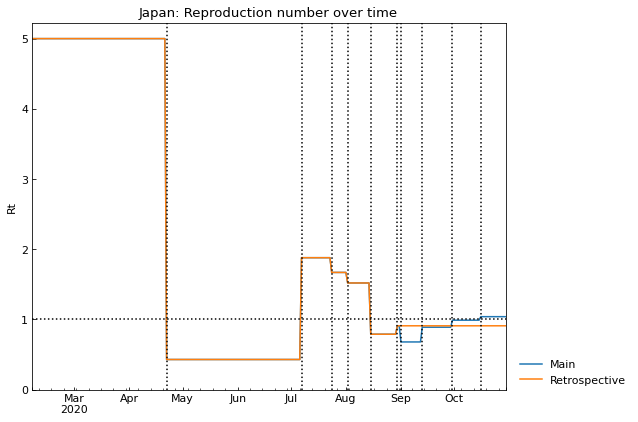

In [48]:
# History of reproduction number
_ = snl_retro.history("Rt")

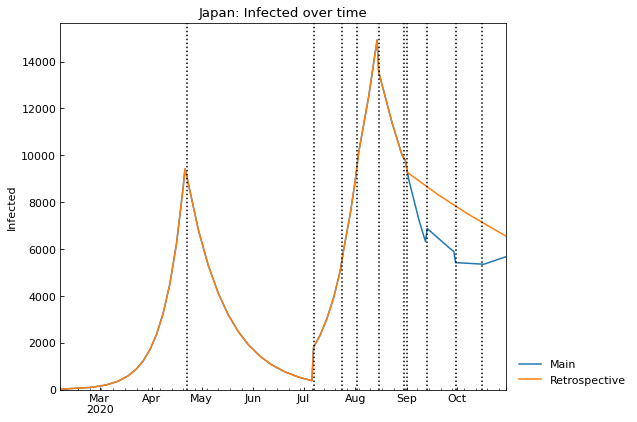

In [49]:
# History of Infected
_ = snl_retro.history("Infected")

In [50]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 31Oct2020,Infected on 31Oct2020,Fatal on 31Oct2020,7th_Rt,8th_Rt,9th_Rt,10th_Rt
Main,14917,14Aug2020,100015,5692,1782,0.68,0.89,0.99,1.04
Retrospective,14917,14Aug2020,97210,6526,2265,0.91,-,-,-
